In [197]:
import re
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
try:
    df = pd.read_csv('autos.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/autos.csv')

Взглянем на данные

In [3]:
df.sample(3)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
85706,2016-03-28 12:57:45,14800,convertible,2011,manual,126,mx_reihe,40000,3,petrol,mazda,no,2016-03-28 00:00:00,0,31582,2016-04-06 16:46:39
254193,2016-03-05 14:07:04,999,sedan,1999,manual,155,other,150000,10,petrol,alfa_romeo,no,2016-03-05 00:00:00,0,65933,2016-03-28 17:15:29
236569,2016-04-04 11:37:37,3600,sedan,2006,manual,75,golf,150000,5,petrol,volkswagen,no,2016-04-04 00:00:00,0,67434,2016-04-06 12:17:34


Переименуем названия колонок

In [4]:
df.columns = ['_'.join(words).lower() for words in [re.findall(r'([A-Z]{1}[a-z]+)', el) for el in df.columns]]

Напишем функцию, выводящую всю статистическую информацию по датасету

In [5]:
def full_info(df):
    display(pd.DataFrame({'Non-Null Count': (~df.isna()).sum(),
                          'Null Count': df.isna().sum(),
                          'Dtype': df.dtypes}).join(df.describe().T).rename_axis('Feature', axis=1).fillna(''))

In [6]:
full_info(df)

Feature,Non-Null Count,Null Count,Dtype,count,mean,std,min,25%,50%,75%,max
date_crawled,354369,0,object,,,,,,,,
price,354369,0,int64,354369.0,4416.656776,4514.158514,0.0,1050.0,2700.0,6400.0,20000.0
vehicle_type,316879,37490,object,,,,,,,,
registration_year,354369,0,int64,354369.0,2004.234448,90.227958,1000.0,1999.0,2003.0,2008.0,9999.0
gearbox,334536,19833,object,,,,,,,,
power,354369,0,int64,354369.0,110.094337,189.850405,0.0,69.0,105.0,143.0,20000.0
model,334664,19705,object,,,,,,,,
kilometer,354369,0,int64,354369.0,128211.172535,37905.34153,5000.0,125000.0,150000.0,150000.0,150000.0
registration_month,354369,0,int64,354369.0,5.714645,3.726421,0.0,3.0,6.0,9.0,12.0
fuel_type,321474,32895,object,,,,,,,,


Наблюдения следующие
- В пяти колонках есть пропуски
- Типы данных неоптимальны

# EDA

По порядку пройдем по всем признакам

## date_crawled

In [7]:
df['date_crawled'] = pd.to_datetime(df['date_crawled'])

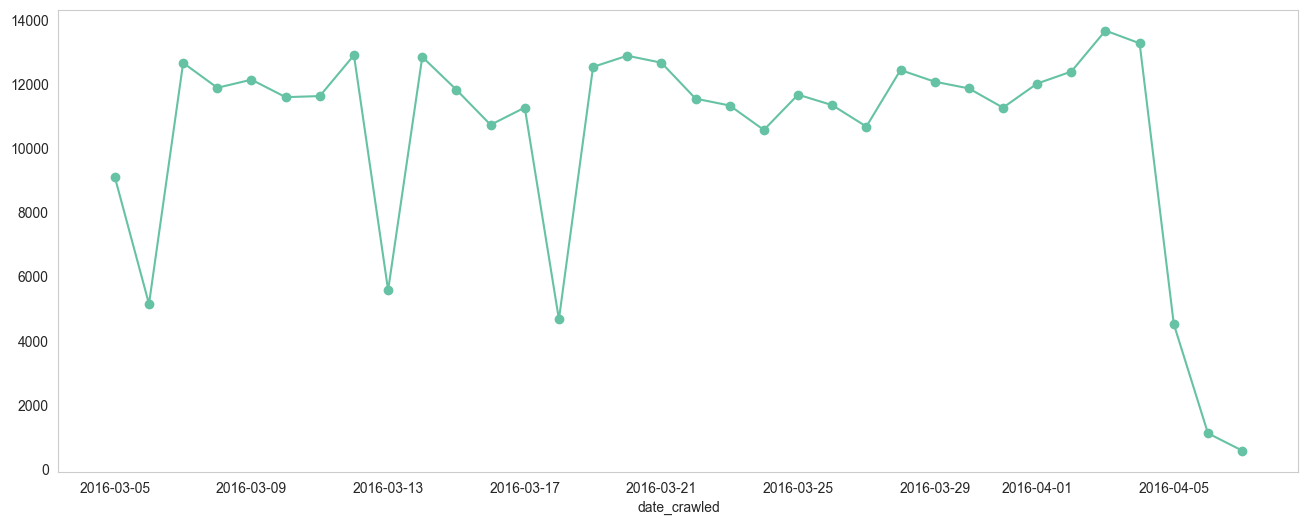

In [112]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
df['date_crawled'].dt.date.value_counts().plot(grid=False, marker='o', color='#66c2a4', ax=ax);

## price

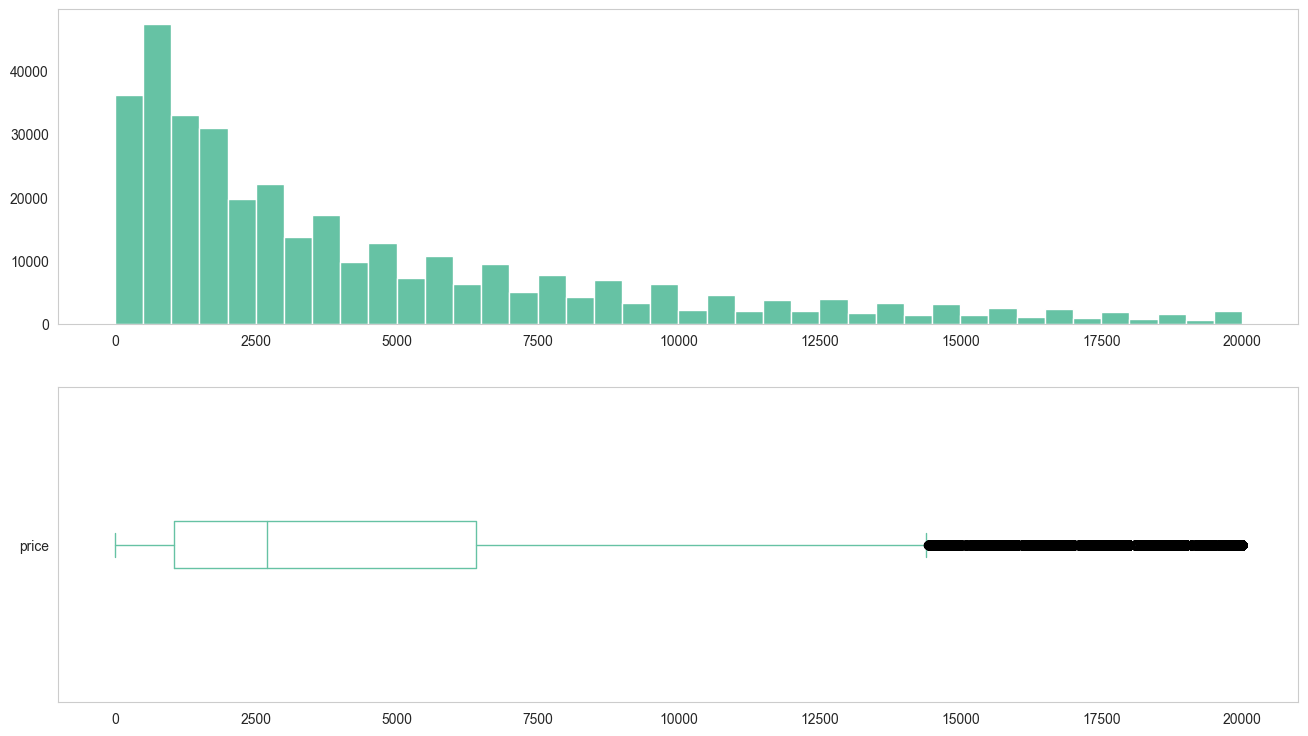

In [44]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 9))
df['price'].hist(grid=False, bins=40, color='#66c2a4', ax=ax1);
df['price'].plot.box(grid=False, vert=False, color='#66c2a4', ax=ax2);

Для цен характерно распределение Пуассона

## vehicle_type

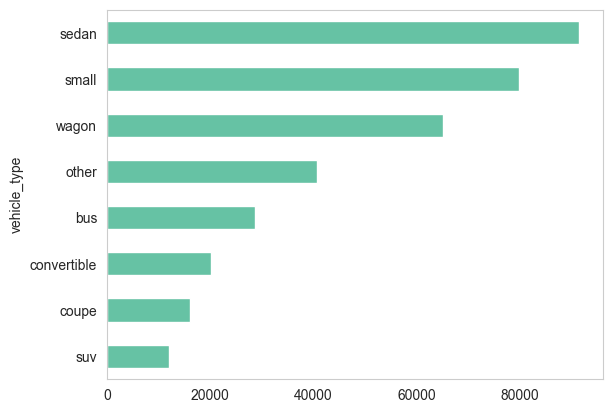

In [275]:
df['vehicle_type'].fillna('NaN').value_counts()[::-1].plot.barh(color='#66c2a4', grid=False);

Почти 40000 тысяч пропусков. Заполним их категорией 'other'

In [86]:
df['vehicle_type'] = df['vehicle_type'].fillna('other')

## registration_year

In [78]:
df['registration_year'].round(-2).value_counts()

registration_year
2000     354018
1900        180
1000         39
10000        27
5000         17
3000          7
1200          5
1800          5
1500          5
6000          5
7000          4
1300          4
2500          4
9000          3
5600          3
1600          3
5900          3
4000          3
2200          3
1100          3
8000          2
8500          2
4500          2
2800          2
2900          1
1700          1
7500          1
8200          1
7100          1
9200          1
7800          1
3200          1
8900          1
9400          1
5300          1
2300          1
6500          1
4800          1
3800          1
3700          1
4100          1
2100          1
1400          1
3500          1
Name: count, dtype: int64

в 2000-ые или хотя бы в 1900-ые было выпущено большинство машин. Тем не менее, достаточно много машин имеют неадекватный год выпуска. Заменим его на медианный для комбинации марка-модель, но только при кросс-валидации, чтобы избежать подглядывания в валидационную выборку.

Убедимся, что наше предположение о невысокой дисперсии года выпуска для сочетания марка-модель верно. Возьмем только машины, выпущенные в адекватные 1920-2019 годы и те, для которых указана модель. Поверим, что кто-то продает столетний раритет

In [146]:
lifecycle = df[(df['registration_year'].between(1920, 2019)) & (df['model']!='other') & ~(df['model'].isna())]

In [241]:
lifecycle.loc[:, 'unit'] = lifecycle.apply(lambda x: '_'.join([x['brand'], x['model']]), axis=1)
lifecycle.groupby('unit')['registration_year'].agg(['count', 'std']).sort_values(by='std', ascending=False)

,count,std
unit,,
land_rover_serie_2,8,18.493242
ford_mustang,177,17.045966
porsche_911,82,14.845267
fiat_500,920,13.190784
volkswagen_kaefer,438,12.208109
...,...,...
mercedes_benz_gl,12,0.717741
daihatsu_materia,18,0.685994
rover_freelander,3,0.577350


В основном в таблицу попали не очень массово выпускавшиеся/раритетные машины. Посмотрим на годы жизни этих линеек и следом сравним с машинами, которые выпускались не так долго

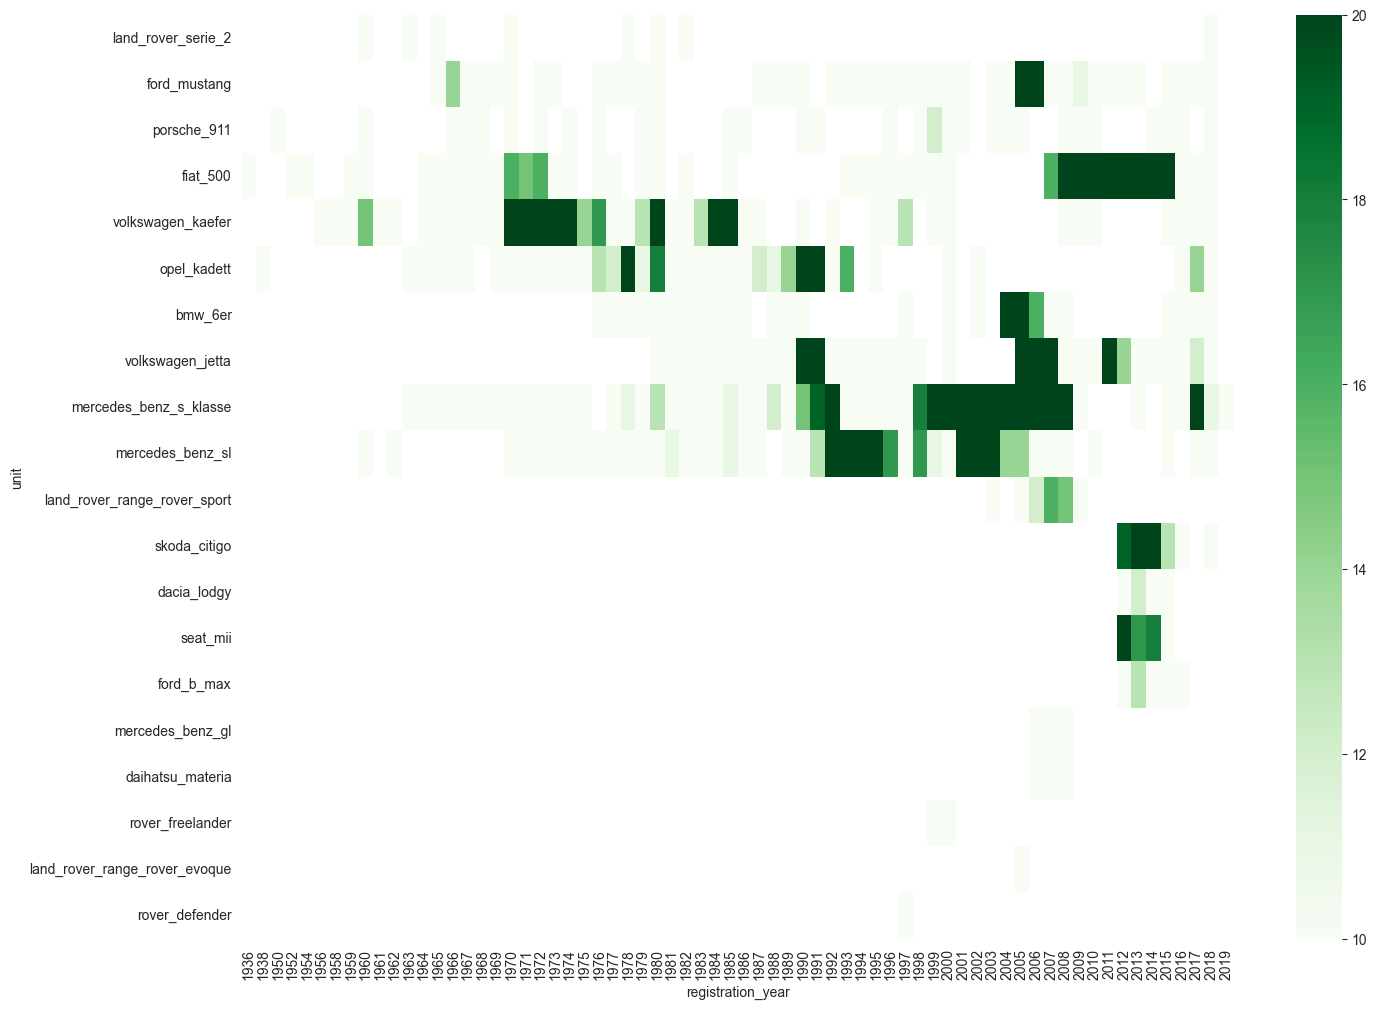

In [329]:
top_models = lifecycle.groupby('unit')['registration_year'].agg(['count', 'std']).sort_values(by='std', ascending=False).index[:10].to_list() + lifecycle.groupby('unit')['registration_year'].agg(['count', 'std']).sort_values(by='std', ascending=False).index[-10:].to_list()


fig, ax = plt.subplots(1, 1, figsize=(16, 12))
sns.heatmap(lifecycle[lifecycle['unit'].isin(top_models)].pivot_table(values='price', index='unit', columns='registration_year', aggfunc='count').reindex(top_models),
            vmin=10, vmax=20,
            cmap='Greens');
ax.grid(False)

В верхней половине графика модели с высокой дисперсией